In [1]:
import pandas as pd

In [2]:
real_df_1 = pd.read_csv('../datasets/online_retail_ii_2009-2010.csv.zstd', compression='zstd', sep=';')


In [3]:
real_df_2 = pd.read_csv('../datasets/online_retail_ii_2010-2011.csv.zstd', compression='zstd', sep=';')

In [4]:
real_df = pd.concat([real_df_1, real_df_2])

In [5]:
df = real_df.copy()

In [6]:
df.info()
df.head()

<class 'pandas.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  str    
 1   StockCode    1067371 non-null  str    
 2   Description  1062989 non-null  str    
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  str    
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 73.3 MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
count,1067371,1067371,1062989,1.067371e+06,1067371,1.067371e+06,824364.000000,1067371
unique,53628,5305,5698,NaN,47635,NaN,NaN,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2010-12-06 16:57:00,NaN,NaN,United Kingdom
freq,1350,5829,5918,NaN,1350,NaN,NaN,981330
mean,NaN,NaN,NaN,9.938898e+00,NaN,4.649388e+00,15324.638504,NaN
std,NaN,NaN,NaN,1.727058e+02,NaN,1.235531e+02,1697.464450,NaN
min,NaN,NaN,NaN,-8.099500e+04,NaN,-5.359436e+04,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000e+00,NaN,1.250000e+00,13975.000000,NaN
50%,NaN,NaN,NaN,3.000000e+00,NaN,2.100000e+00,15255.000000,NaN
75%,NaN,NaN,NaN,1.000000e+01,NaN,4.150000e+00,16797.000000,NaN


In [8]:
df = df.rename(columns={
    'Customer ID': 'CustomerID',
    'Invoice': 'InvoiceID',
})
df

,InvoiceID,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [9]:
isna_counts = df.isna().sum().to_dict()
isna_counts = pd.DataFrame.from_dict(isna_counts, orient='index', columns=['Count']).sort_values(ascending=False, by='Count')
isna_counts['Percentage'] = round((isna_counts['Count'] / len(df)) * 100, 2)
print('Count of Missing Values:')
display(isna_counts)

Count of Missing Values:


,Count,Percentage
CustomerID,243007,22.77
Description,4382,0.41
StockCode,0,0.00
InvoiceID,0,0.00
Quantity,0,0.00
InvoiceDate,0,0.00
Price,0,0.00
Country,0,0.00


In [10]:
duplicated_counts = df.duplicated().sum()
print('Count of Duplicated Rows: ', duplicated_counts)

duplicated_samples = df[df.duplicated()]
display(duplicated_samples.head())

Count of Duplicated Rows:  34335


,InvoiceID,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
371,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
383,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom
384,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom
385,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom
386,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom


In [11]:
nunique_counts = dict()
for i in df.columns:
    nunique_counts[i] = df[i].nunique()

nunique_counts = pd.DataFrame.from_dict(nunique_counts, orient='index', columns=['Count']).sort_values(ascending=False, by='Count')
nunique_counts['Percentage'] = round((nunique_counts['Count'] / len(df)) * 100, 2)
print('Count of Unique Values: ')
nunique_counts

Count of Unique Values: 


,Count,Percentage
InvoiceID,53628,5.02
InvoiceDate,47635,4.46
CustomerID,5942,0.56
Description,5698,0.53
StockCode,5305,0.50
Price,2807,0.26
Quantity,1057,0.10
Country,43,0.00


In [12]:
df_alpha = df[df['InvoiceID'].astype(str).str.contains(r'[A-Za-z]', regex=True)]
df_alpha['InvoiceID'].unique()[:20]


df_alpha['InvoiceID'].astype(str).str[0].value_counts()
df[df['InvoiceID'].astype(str).str.startswith('A')]

,InvoiceID,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [13]:
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt

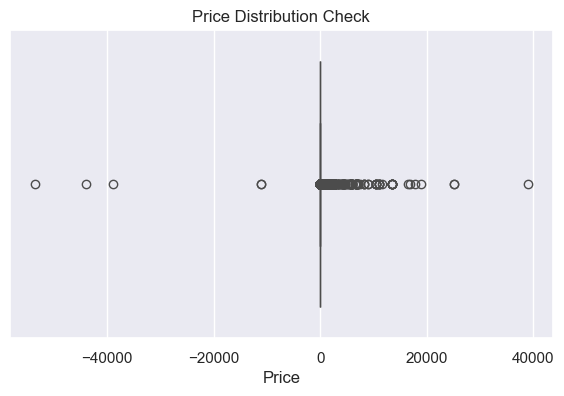

,count,mean,std,min,25%,50%,75%,max
Price,1067371.0,4.649388,123.553059,-53594.36,1.25,2.1,4.15,38970.0


In [14]:
plt.figure(figsize=(7,4))
plt.title('Price Distribution Check')

sns.boxplot(x=df['Price'], orient='y')
plt.show()

price_desc = pd.DataFrame(df['Price'].describe()).transpose()
display(price_desc)


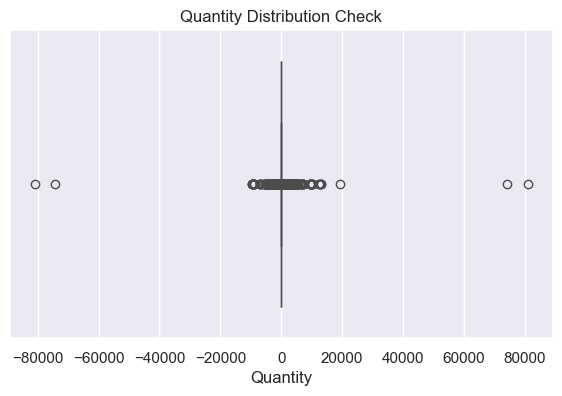

,count,mean,std,min,25%,50%,75%,max
Quantity,1067371.0,9.938898,172.705794,-80995.0,1.0,3.0,10.0,80995.0


In [15]:
plt.figure(figsize=(7,4))
plt.title('Quantity Distribution Check')

sns.boxplot(x=df['Quantity'], orient='y')
plt.show()

quantity_desc = pd.DataFrame(df['Quantity'].describe()).transpose()
display(quantity_desc)


In [16]:
df_before = df.copy()
df = df.drop_duplicates()

before = len(df_before)
after = len(df)
removed = before - after
pct_removed = round((removed / before * 100),2)

removal_summary = pd.DataFrame({
    'Before': [before],
    'After': [after],
    'Removed': [removed],
    'Pct_Removed (%)': [pct_removed]
})

display(removal_summary)

,Before,After,Removed,Pct_Removed (%)
0,1067371,1033036,34335,3.22


In [17]:
desc_map = df.dropna(subset=['Description']).drop_duplicates('StockCode').set_index('StockCode')['Description']

df['Description'] = df['Description'].fillna(df['StockCode'].map(desc_map))

In [18]:
df['Description'] = df['Description'].fillna('Unknown Product')

In [19]:
df['IsGuest'] = df['CustomerID'].isna()
df['CustomerID'] = df['CustomerID'].fillna(99999).astype('int64')

In [20]:
isna_counts = df.isna().sum().to_dict()
isna_counts = pd.DataFrame.from_dict(isna_counts, orient='index', columns=['Count']).sort_values(ascending=False, by='Count')
isna_counts['Percentage'] = round((isna_counts['Count'] / len(df)) * 100, 2)
print('Count of Missing Values:')
display(isna_counts)

Count of Missing Values:


,Count,Percentage
InvoiceID,0,0.0
StockCode,0,0.0
Description,0,0.0
Quantity,0,0.0
InvoiceDate,0,0.0
Price,0,0.0
CustomerID,0,0.0
Country,0,0.0
IsGuest,0,0.0


In [21]:
df_before = df.copy()
cols = ['Quantity', 'Price']

outlier_summary = []

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    flag_col = f'Is{col}Outlier'
    df[flag_col] = (df[col] < lower) | (df[col] > upper)
    
    outlier_count = df[flag_col].sum()
    pct = round((outlier_count / len(df)) * 100, 2)
    
    outlier_summary.append({
        'Column': col,
        'Lower': lower,
        'Upper': upper,
        'Outlier_Count': outlier_count,
        'Pct (%)': pct
    })

outlier_summary = pd.DataFrame(outlier_summary)
display(outlier_summary)


,Column,Lower,Upper,Outlier_Count,Pct (%)
0,Quantity,-12.5,23.5,114434,11.08
1,Price,-3.1,8.5,66196,6.41


In [22]:
df_before = df.copy()

datetime_cols = ['InvoiceDate']
category_cols = ['CustomerID','Country','StockCode','Description','InvoiceID']
int_cols = ['Quantity']
float_cols = ['Price']

df[datetime_cols] = df[datetime_cols].apply(pd.to_datetime, unit='D')
df[category_cols] = df[category_cols].astype('category')
df[int_cols] = df[int_cols].astype('int64')
df[float_cols] = df[float_cols].astype('float64')

In [23]:
df_before.info()

<class 'pandas.DataFrame'>
Index: 1033036 entries, 0 to 541909
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   InvoiceID          1033036 non-null  str    
 1   StockCode          1033036 non-null  str    
 2   Description        1033036 non-null  str    
 3   Quantity           1033036 non-null  int64  
 4   InvoiceDate        1033036 non-null  str    
 5   Price              1033036 non-null  float64
 6   CustomerID         1033036 non-null  int64  
 7   Country            1033036 non-null  str    
 8   IsGuest            1033036 non-null  bool   
 9   IsQuantityOutlier  1033036 non-null  bool   
 10  IsPriceOutlier     1033036 non-null  bool   
dtypes: bool(3), float64(1), int64(2), str(5)
memory usage: 73.9 MB


In [24]:
df.info()

<class 'pandas.DataFrame'>
Index: 1033036 entries, 0 to 541909
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceID          1033036 non-null  category      
 1   StockCode          1033036 non-null  category      
 2   Description        1033036 non-null  category      
 3   Quantity           1033036 non-null  int64         
 4   InvoiceDate        1033036 non-null  datetime64[us]
 5   Price              1033036 non-null  float64       
 6   CustomerID         1033036 non-null  category      
 7   Country            1033036 non-null  category      
 8   IsGuest            1033036 non-null  bool          
 9   IsQuantityOutlier  1033036 non-null  bool          
 10  IsPriceOutlier     1033036 non-null  bool          
dtypes: bool(3), category(5), datetime64[us](1), float64(1), int64(1)
memory usage: 45.9 MB


In [25]:
df = df.assign(
    Hour = df['InvoiceDate'].dt.hour.astype('int64'),
    Year = df['InvoiceDate'].dt.year.astype('int64'),
    Month = df['InvoiceDate'].dt.month.astype('int64'),
    Day = df['InvoiceDate'].dt.day.astype('int64'),
    Week = df['InvoiceDate'].dt.isocalendar().week.astype('int64'),
    DayName = df['InvoiceDate'].dt.day_name().astype('category'),
    MonthName = df['InvoiceDate'].dt.month_name().astype('category')
)

In [26]:
df = df.assign(
    IsNegQty = df['Quantity'] < 0,
    IsNegPrice = df['Price'] < 0
)

In [27]:
df['IsCanceled'] = df['InvoiceID'].astype(str).str.startswith('C')
df['IsAdjusted'] = df['InvoiceID'].astype(str).str.startswith('A')

In [28]:
df['TotalPrice'] = (df['Quantity'] * df['Price']).astype('float64')

In [29]:
df['InvoiceDate'] = df['InvoiceDate'].dt.normalize()

In [30]:
df.info()
df.head()

<class 'pandas.DataFrame'>
Index: 1033036 entries, 0 to 541909
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   InvoiceID          1033036 non-null  category      
 1   StockCode          1033036 non-null  category      
 2   Description        1033036 non-null  category      
 3   Quantity           1033036 non-null  int64         
 4   InvoiceDate        1033036 non-null  datetime64[us]
 5   Price              1033036 non-null  float64       
 6   CustomerID         1033036 non-null  category      
 7   Country            1033036 non-null  category      
 8   IsGuest            1033036 non-null  bool          
 9   IsQuantityOutlier  1033036 non-null  bool          
 10  IsPriceOutlier     1033036 non-null  bool          
 11  Hour               1033036 non-null  int64         
 12  Year               1033036 non-null  int64         
 13  Month              1033036 non-null  int64  

,InvoiceID,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,IsGuest,IsQuantityOutlier,...,Month,Day,Week,DayName,MonthName,IsNegQty,IsNegPrice,IsCanceled,IsAdjusted,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01,6.95,13085,United Kingdom,False,False,...,12,1,49,Tuesday,December,False,False,False,False,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,False,False,...,12,1,49,Tuesday,December,False,False,False,False,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01,6.75,13085,United Kingdom,False,False,...,12,1,49,Tuesday,December,False,False,False,False,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01,2.10,13085,United Kingdom,False,True,...,12,1,49,Tuesday,December,False,False,False,False,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01,1.25,13085,United Kingdom,False,True,...,12,1,49,Tuesday,December,False,False,False,False,30.0


In [31]:
df.to_csv('../datasets/online-retail-ii-cleaned.csv.zstd', sep=';', index=False, compression='zstd')